In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
class Bandit:
    def __init__(self, mu):
        # actual mean of the Bandit arm. 
        self.mu = mu
        # mean computed so far given randomly selected data (from pull())
        self.mean = 0
        # number of pulls from this Bandit arm so far
        self.N = 0
        
    def pull(self):
        # pick a value from a Gaussian distribution and mean of mu (constant)
        return np.random.randn() + self.mu

    def update(self, x):
        # update mean by adding the latest x to the dataset.
        # Note: Using this hacky defintion, we don't need to store all the datapoints
        self.N += 1
        aN = 1.0/self.N
        self.mean = (1.0 - aN)*self.mean + aN*x

In [41]:
def run_MultiArm_Bandit_experiment(m1=0.25, m2=0.25, eps=0.1, N_iter=1000):
    # Run MA-Bandit experiment on two arms with probablities m1 and m2. 
    # Method:Epsilon-Greedy algorithm. 
    # Set a positive (small ) value for epsilon
    def _compute_cumulitave_avg(data):
        return np.cumsum(data) / (np.arange(len(data))+1)
    
    bandits = [Bandit(m1), Bandit(m2)]
    N_arms = 2
    # run experiment
    # Create an empty 1D array to store x variables (for plotting)
    data = np.empty(N_iter)
    for i in range(N_iter):
        # Pick a random number between [0,1] 
        p_ = np.random.random()
        # Pick one of the arms randomly if it is less than epsilon
        if p_ < eps:
            which_bandit = np.random.choice(N_arms)
        else: # Check bandit has the highest mean so far. Pull from this bandit."
            # Create an array of all bandits' mean values up to now
            means = [b.mean for b in bandits]
            which_bandit = np.argmax(means)
        # Pull the
        x = bandits[which_bandit].pull()
        bandits[which_bandit].update(x)
        
        data[i] = x
    return _compute_cumulitave_avg(data)

In [89]:
# Experiment one
# Interesting observation: If we pick a very small value for epsilon, 
# it will take a very long time to converge to the right solution.

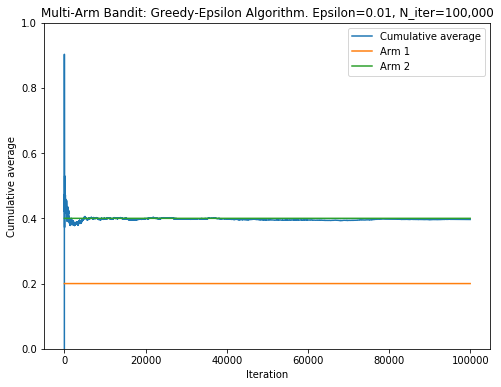

In [98]:
m1 = 0.2
m2 = 0.4
eps = 0.01
exp1 = run_MultiArm_Bandit_experiment(m1=m1, m2=m2, eps=eps,N_iter = 100000)
plt.figure(figsize=(8,6))
plt.plot(exp1, label='Cumulative average')
plt.plot(np.ones(len(exp1))*m1, label='Arm 1')
plt.plot(np.ones(len(exp1))*m2, label='Arm 2')
plt.ylim([0,1])
plt.ylabel('Cumulative average')
plt.xlabel('Iteration')
plt.legend()
plt.title('Multi-Arm Bandit: Greedy-Epsilon Algorithm. Epsilon=0.01, N_iter=100,000')
# plt.xscale('log')
plt.show()

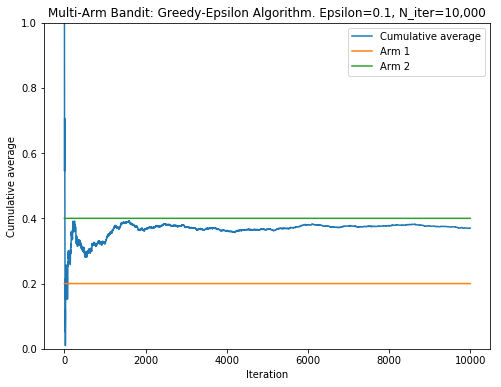

In [97]:
m1 = 0.2
m2 = 0.4
eps = 0.1
exp1 = run_MultiArm_Bandit_experiment(m1=m1, m2=m2, eps=eps,N_iter = 10000)
plt.figure(figsize=(8,6))
plt.plot(exp1, label='Cumulative average')
plt.plot(np.ones(len(exp1))*m1, label='Arm 1')
plt.plot(np.ones(len(exp1))*m2, label='Arm 2')
plt.ylim([0,1])
plt.ylabel('Cumulative average')
plt.xlabel('Iteration')
plt.legend()
plt.title('Multi-Arm Bandit: Greedy-Epsilon Algorithm. Epsilon=0.1, N_iter=10,000')
# plt.xscale('log')
plt.show()